# Ensemble Regression Method


In [10]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()
import seaborn as sns


#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## Random forest


In [11]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['mse'], 
              "min_samples_leaf": [0.03,0.05,0.1,0.3], "random_state" : [42]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.803422 using {'criterion': 'mse', 'min_samples_leaf': 0.03, 'n_estimators': 200, 'random_state': 42}
0.779937 (0.027002) with: {'criterion': 'mse', 'min_samples_leaf': 0.03, 'n_estimators': 5, 'random_state': 42}
0.801437 (0.023520) with: {'criterion': 'mse', 'min_samples_leaf': 0.03, 'n_estimators': 10, 'random_state': 42}
0.802261 (0.030547) with: {'criterion': 'mse', 'min_samples_leaf': 0.03, 'n_estimators': 100, 'random_state': 42}
0.803422 (0.028464) with: {'criterion': 'mse', 'min_samples_leaf': 0.03, 'n_estimators': 200, 'random_state': 42}
0.755023 (0.030909) with: {'criterion': 'mse', 'min_samples_leaf': 0.05, 'n_estimators': 5, 'random_state': 42}
0.760169 (0.033483) with: {'criterion': 'mse', 'min_samples_leaf': 0.05, 'n_estimators': 10, 'random_state': 42}
0.762578 (0.040787) with: {'criterion': 'mse', 'min_samples_leaf': 0.05, 'n_estimators': 100, 'random_state': 42}
0.761056 (0.041212) with: {'criterion': 'mse', 'min_samples_leaf': 0

0.8348881386342123

In [5]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.9919082454094554
MSE train:  7.887288818164113
RMSE train:  2.8084317364258853
r2:  0.9372057297903339
MAE test:  2.230093292398452
MSE test:  8.669634842915404
RMSE test:  2.944424365290337
r2:  0.9137221342586663


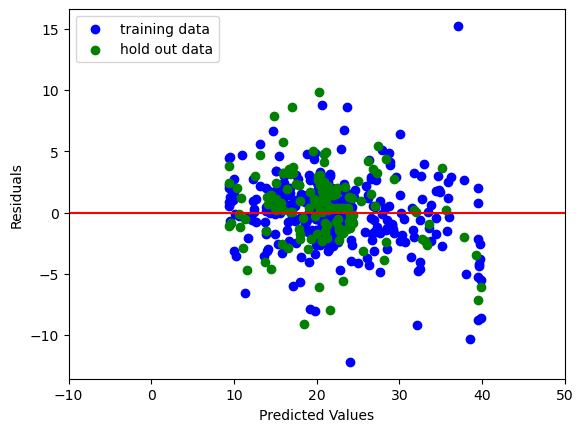

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [8]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_.estimators_[100],feature_names=columns.tolist(), max_depth=2)
print(r)


|--- RM <= 6.92
|   |--- LSTAT <= 14.40
|   |   |--- RM <= 6.53
|   |   |   |--- truncated branch of depth 5
|   |   |--- RM >  6.53
|   |   |   |--- truncated branch of depth 2
|   |--- LSTAT >  14.40
|   |   |--- CRIM <= 7.70
|   |   |   |--- truncated branch of depth 4
|   |   |--- CRIM >  7.70
|   |   |   |--- truncated branch of depth 2
|--- RM >  6.92
|   |--- RM <= 7.35
|   |   |--- LSTAT <= 5.44
|   |   |   |--- value: [34.99]
|   |   |--- LSTAT >  5.44
|   |   |   |--- value: [30.86]
|   |--- RM >  7.35
|   |   |--- value: [38.98]



In [ ]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn import tree
tree.export_graphviz(gs.best_estimator_.estimators_[0], out_file='tree_from_forest.dot',feature_names=columns.tolist(),max_depth=4)

In [11]:
!dot -Tpng tree_from_forest.dot -o tree_from_forest.png -Gdpi=600

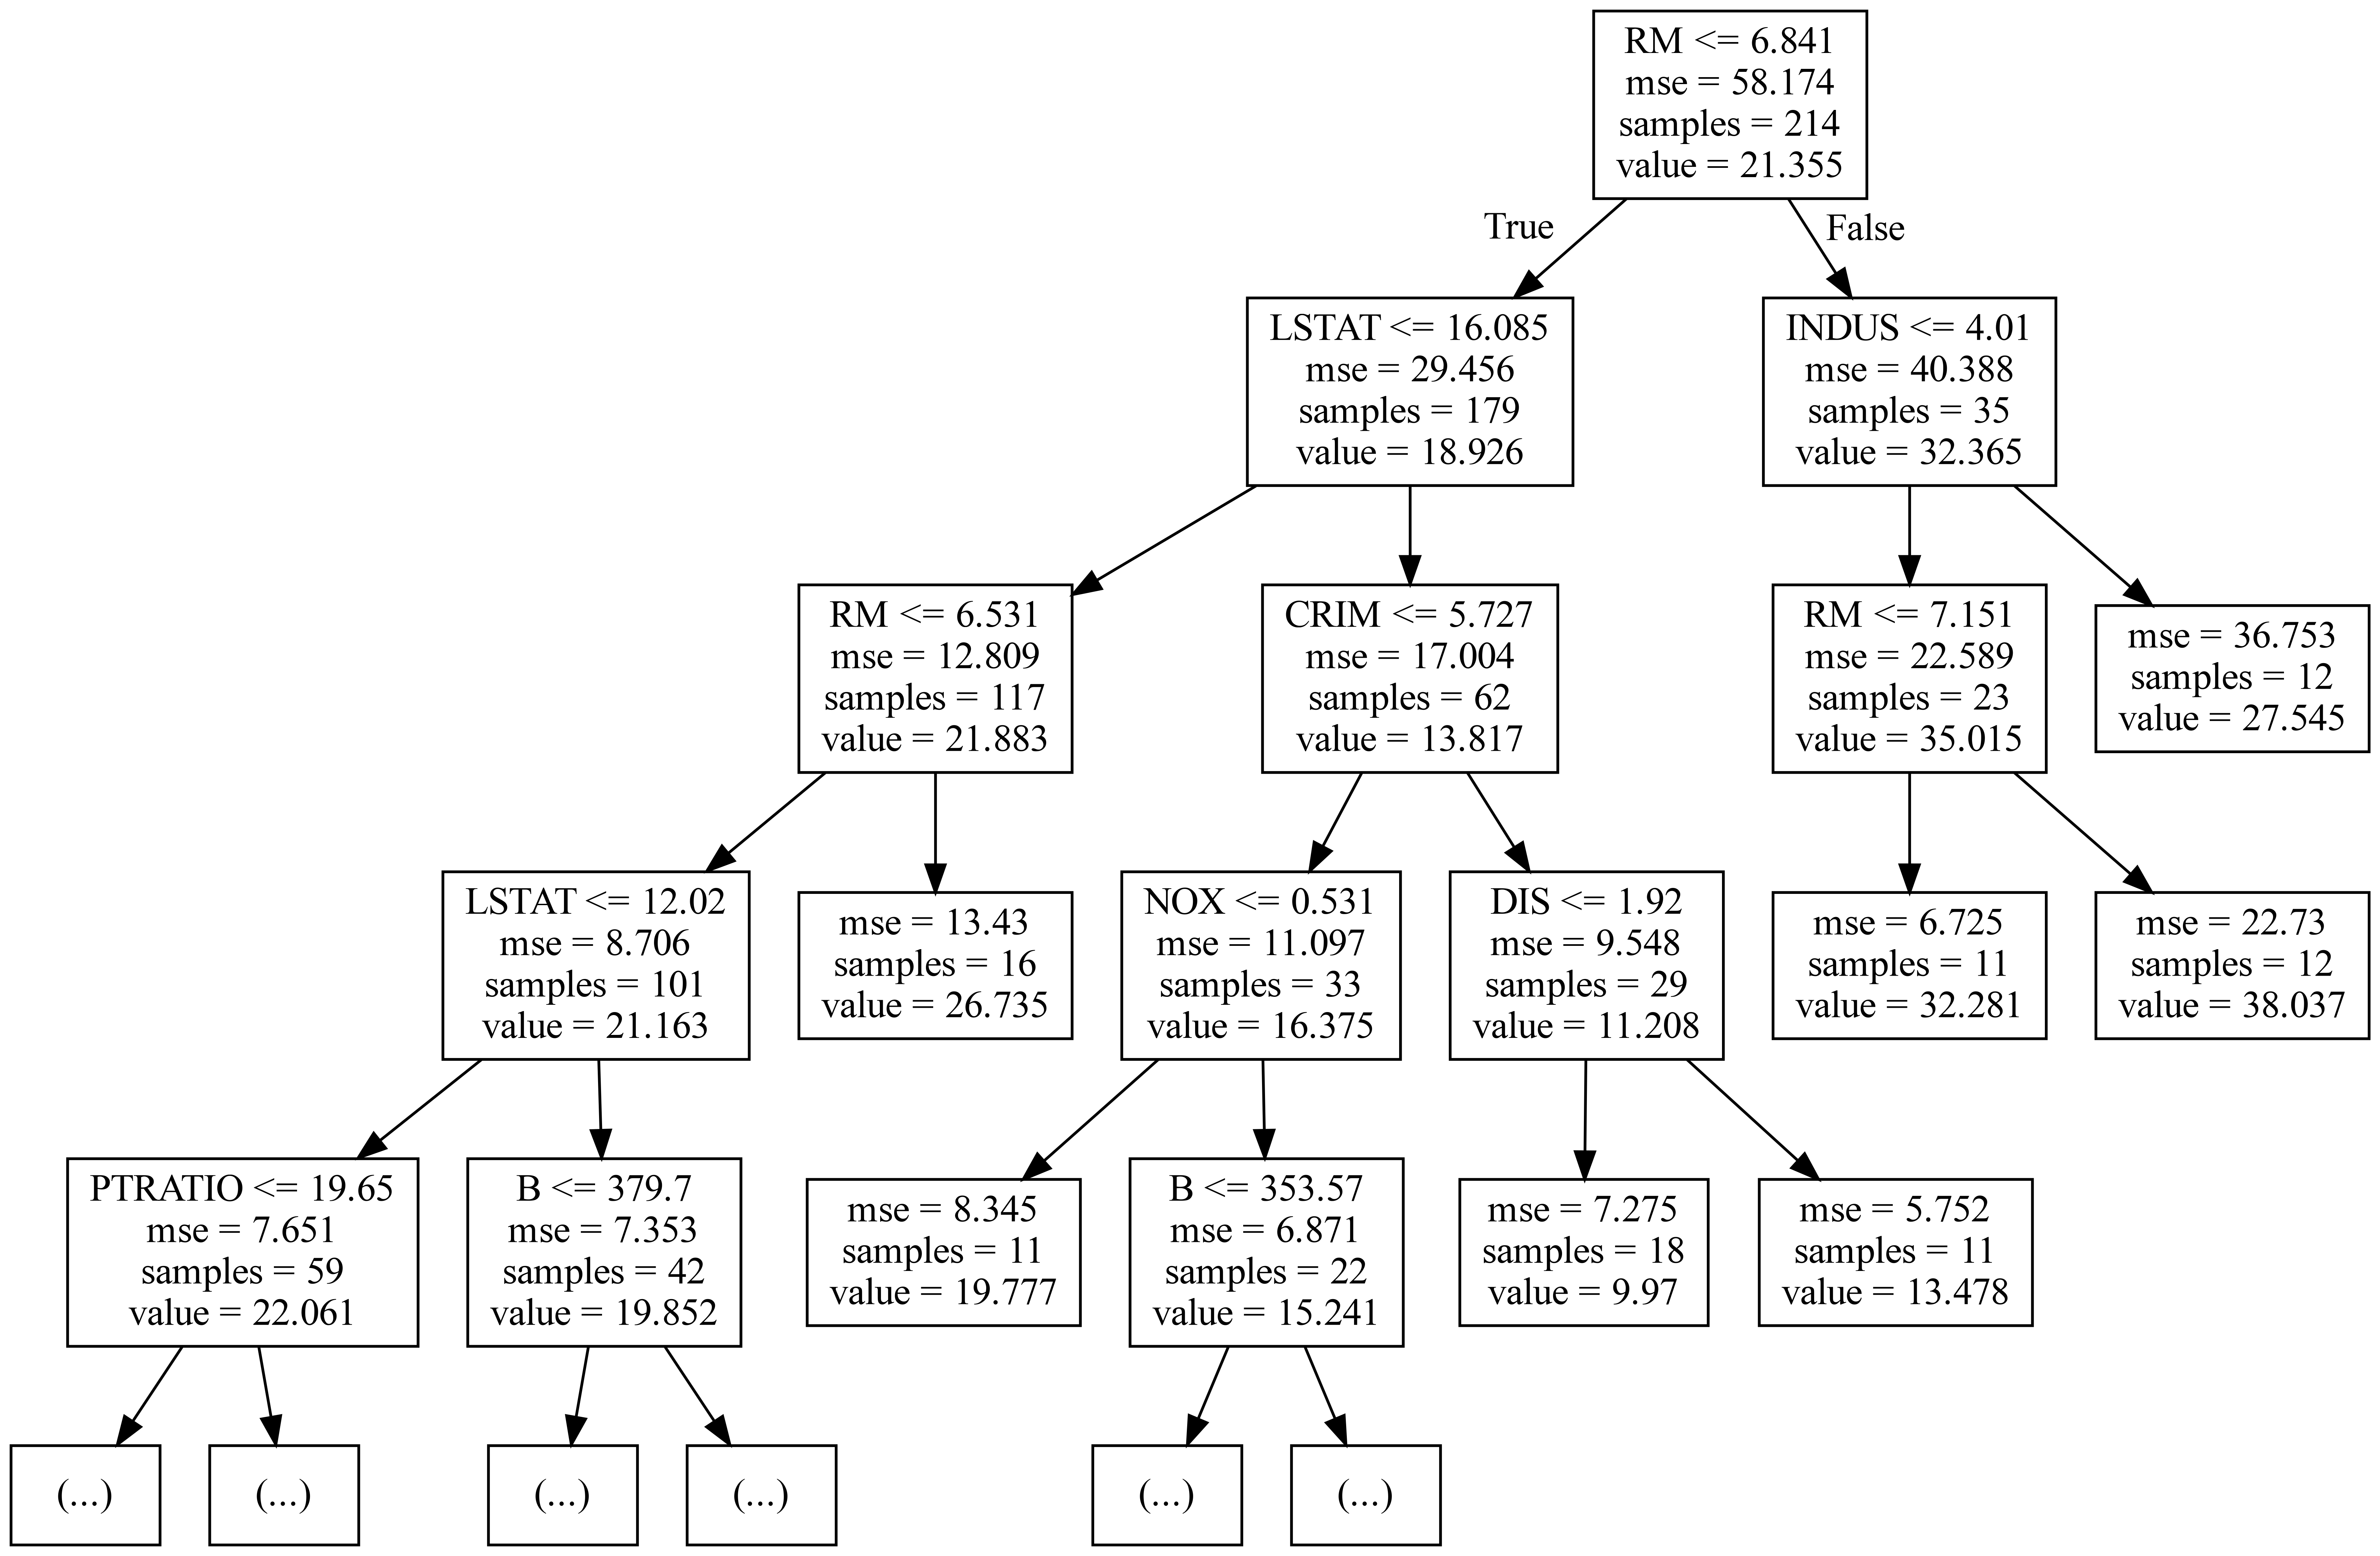

In [12]:
from IPython.display import Image
Image(filename = 'tree_from_forest.png')

<AxesSubplot:>

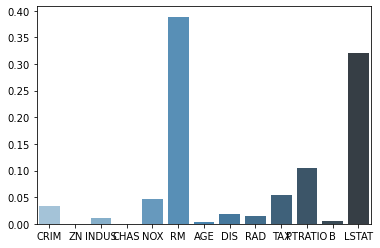

In [14]:
sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, palette="Blues_d")

## AdaBoost

In [9]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


base1=SVR(kernel='linear')
base2=DecisionTreeRegressor(max_depth=3)

regressor = AdaBoostRegressor()
parameters = {"n_estimators":[10,50], "base_estimator": [base1,base2], 
              "learning_rate":[0.5,1.0,1.1], "random_state" : [4]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
y_train_pred=gs.predict(X_train)
y_pred=gs.predict(X_test)


In [ ]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_train, y_train_pred)))

print("MAE test: ", metrics.mean_absolute_error(y_test,y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_test, y_pred)))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),y_train_pred-y_train, c="b", label="training")
plt.scatter(gs.predict(X_test),y_pred-y_test, c="g", label="test")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

# Gradient Boosting

$$ \hat{y_i} = F_M(x_i) = \sum_{m=1}^{M} h_m(x_i) $$
$$ F_m(x) = F_{m-1}(x) + h_m(x)$$
$$ h_m =  \arg\min_{h} L_m = \arg\min_{h} \sum_{i=1}^{n}
l(y_i, F_{m-1}(x_i) + h(x_i))$$

$$ F_m(x) = F_{m-1}(x) + \nu h_m(x)$$



In [15]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[20,50,70,100,200], "learning_rate":[0.1, 0.5,1,2], 
              "random_state" : [0] ,
             "max_depth":[1]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.839042 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'random_state': 0}
0.670644 (0.015695) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}
0.809183 (0.017359) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.822335 (0.016185) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 70, 'random_state': 0}
0.829915 (0.015525) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'random_state': 0}
0.839042 (0.015164) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'random_state': 0}
0.783288 (0.038936) with: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}
0.808363 (0.022997) with: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.810621 (0.018760) with: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 70, 'random_state': 0}
0.814456 (0.019113) with: {'learnin

0.8531518232468176

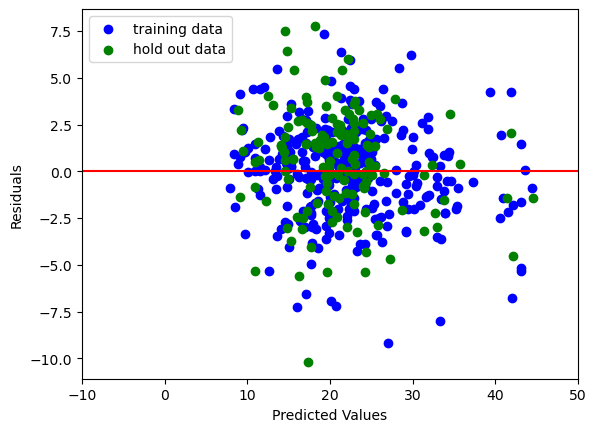

In [16]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.7839483690489528
MSE train:  5.63785991454612
RMSE train:  2.374417805388538
r2:  0.9555351666990746
MAE test:  2.187736723980425
MSE test:  7.710651792468915
RMSE test:  2.7768060415644653
r2:  0.9236621802622523
